In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [4]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_raw_snps.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_raw_snps.h5', fields='*', overwrite=True)

In [2]:
callset_fn = '/media/scervant/Transcend/GenTree_GM_h5_plus_vcf/Betula_pendula/Bpendula_GM_raw_snps.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Bpendula_GM_raw_snps.h5" (mode r)>

In [3]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [4]:
calldata = callset['calldata']

In [5]:
calldata

<HDF5 group "/calldata" (10 members)>

In [6]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [7]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QD', 'AN', 'MQ', 'SOR', 'numalt', 'QUAL', 'MQRankSum', 'ReadPosRankSum'])
variants

<VariantChunkedTable shape=(846813,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QD', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('SOR', '<f4'), ('numalt', '<i4'), ('QUAL', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4')]
   nbytes=58.1M cbytes=20.7M cratio=2.8
   values=h5py._hl.group.Group>

In [87]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


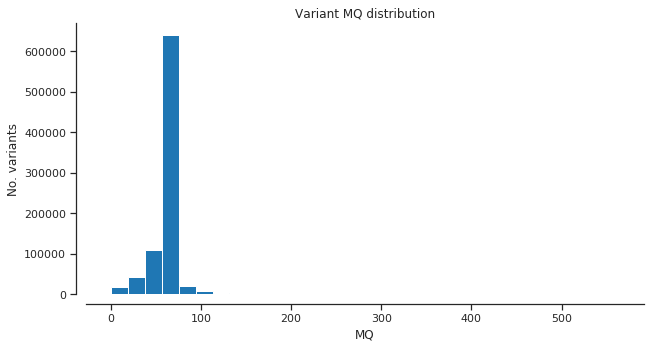

In [88]:
plot_variant_hist('MQ')

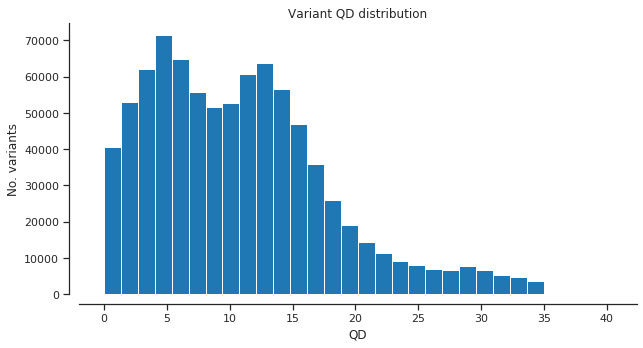

In [89]:
plot_variant_hist('QD')

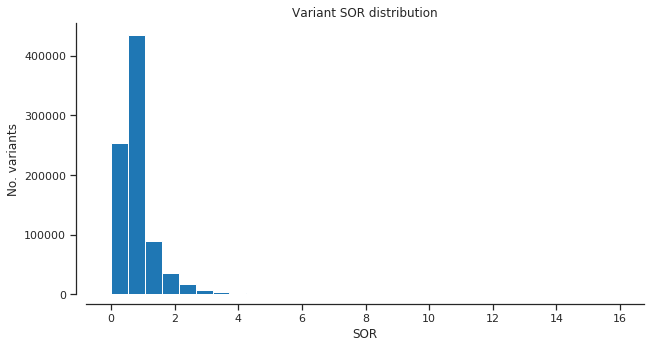

In [90]:
plot_variant_hist('SOR')

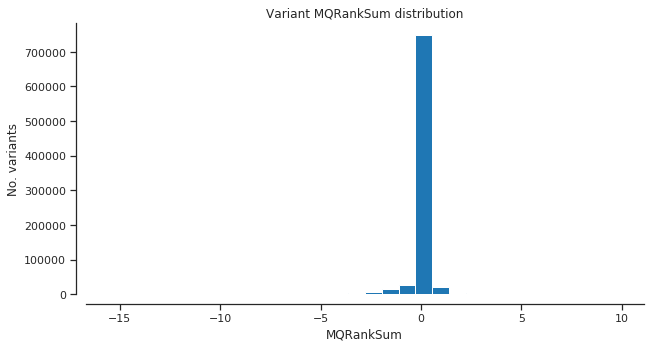

In [91]:
plot_variant_hist('MQRankSum')

In [ ]:
plot_variant_hist('MQRankSum')

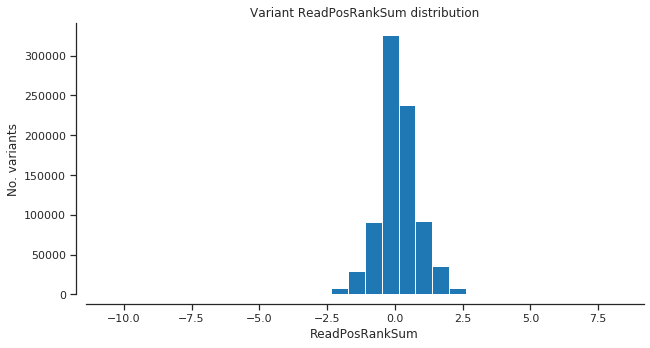

In [93]:
plot_variant_hist('ReadPosRankSum')

### Filter out positions with DP <10 and QD < 2

In [15]:
filter_expression = '(DP > 20) & (QD > 2) & (AN > 576)'
###soft filter for removing calls with very little support

In [16]:
variant_selection = variants.eval(filter_expression)[:]
variant_selection

<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater


array([ True,  True,  True, ...,  True,  True,  True])

### How many variants were kept?

In [94]:
np.count_nonzero(variant_selection)

779448

In [18]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [19]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(846813, 576, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=930.3M cbytes=63.9M cratio=14.6
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [137]:
samples = callset['samples']
samples = list(samples)
samples

['CH-BP-05-01',
 'DE-BP-10-13',
 'GB-BP-14-27',
 'NO-BP-15-06',
 'IT-BP-08-02',
 'LT-BP-12-14',
 'FI-BP-19-22',
 'FR-BP-03-23',
 'SE-BP-18-13',
 'FR-BP-03-03',
 'CH-BP-06-23',
 'FR-BP-21-10',
 'YT-1045',
 'FR-BP-21-17',
 'YT-870',
 'GB-BP-14-22',
 'FI-BP-20-05',
 'GB-BP-13-21',
 'GB-BP-14-17',
 'CH-BP-06-21',
 'DE-BP-10-01',
 'GB-BP-13-03',
 'IT-BP-08-14',
 'NO-BP-15-02',
 'FI-BP-20-01',
 'FR-BP-04-10',
 'DE-BP-10-12',
 'DE-BP-09-06',
 'CH-BP-06-12',
 'LT-BP-11-08',
 'SE-BP-18-20',
 'FR-BP-03-04',
 'NO-BP-16-11',
 'ES-BP-02-25',
 'SE-BP-18-18',
 'SE-BP-18-06',
 'ES-BP-02-16',
 'IT-BP-07-11',
 'SE-BP-17-05',
 'YT-243',
 'LT-BP-11-10',
 'NO-BP-16-17',
 'ES-BP-01-15',
 'NO-BP-16-23',
 'GB-BP-14-26',
 'FI-BBU',
 'YT-235',
 'SE-BP-18-23',
 'DE-BP-09-01',
 'DE-BP-10-18',
 'NO-BP-16-13',
 'FR-BP-04-09',
 'IT-BP-07-17',
 'LT-BP-12-16',
 'SE-BP-17-14',
 'FR-BP-03-21',
 'IT-BP-08-04',
 'ES-BP-02-22',
 'SE-BP-17-17',
 'SE-BP-18-07',
 'DE-BP-09-05',
 'IT-BP-08-06',
 'LT-BP-12-13',
 'FR-BP-21-22',


# load metadata file

In [149]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_SAMPLES_GM_raw_snps.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [150]:
samples.Population.value_counts()

YT          50
IT-BP-8     25
SE-BP-18    25
DE-BP-10    25
NO-BP-16    25
SE-BP-17    25
FI-BP-20    25
GB-BP-14    25
NO-BP-15    25
ES-BP-1     25
FI-BP-19    25
FR-BP-4     25
ES-BP-2     25
FR-BP-21    25
LT-BP-12    25
LT-BP-11    25
IT-BP-7     25
DE-BP-9     25
FR-BP-3     25
CH-BP-6     25
CH-BP-5     25
GB-BP-13    24
FI-BBU       1
FI-BN        1
Name: Population, dtype: int64

In [151]:
sample_selection = samples.Population.isin({'CH-BP-5', 'CH-BP-6', 'DE-BP-9', 'DE-BP-10', 'ES-BP-1', 'ES-BP-2',
       'FI-BBU', 'FI-BN', 'FI-BP-19', 'FI-BP-20', 'FR-BP-3', 'FR-BP-4',
       'FR-BP-21', 'GB-BP-13', 'GB-BP-14', 'IT-BP-7', 'IT-BP-8',
       'LT-BP-11', 'LT-BP-12', 'NO-BP-15', 'NO-BP-16', 'SE-BP-17',
       'SE-BP-18', 'YT'}).values
sample_selection[:5]

array([ True,  True,  True,  True,  True])

In [152]:
samples_subset = samples[sample_selection]
samples_subset.reset_index(drop=True, inplace=True)
samples_subset

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [153]:
%%time
genotypes_subset = genotypes.subset(variant_selection, sample_selection)

CPU times: user 7.26 s, sys: 37.4 ms, total: 7.3 s
Wall time: 6.73 s


In [154]:
genotypes_subset

<GenotypeChunkedArray shape=(779448, 576, 2) dtype=int8 chunks=(1523, 576, 2)
   nbytes=856.3M cbytes=117.8M cratio=7.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

### grab the allele counts for the populations

In [61]:
ac = genotypes_subset.count_alleles()
ac

<AlleleCountsChunkedArray shape=(779448, 5) dtype=int32 chunks=(24358, 5)
   nbytes=14.9M cbytes=3.1M cratio=4.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

### Which ones are biallelic?

In [62]:
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[1085,    1],
       [1062,    2],
       [1025,   29],
       ...,
       [1001,    1],
       [ 997,    1],
       [ 973,    1]], dtype=int32)

### Plot the SFS of the derived allele

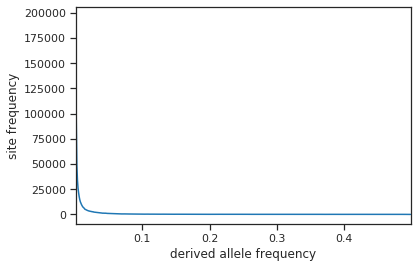

In [63]:
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

### Select only biallelic variants

In [64]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites

In [65]:
biallelic

<ChunkedArrayWrapper shape=(779448,) dtype=bool chunks=(194862,)
   nbytes=761.2K cbytes=222.9K cratio=3.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [66]:
%%time
genotypes_subset_2 = genotypes_subset.compress(biallelic)
genotypes_subset_2
###subset the array genotypes_subset by keeping only biallelic sites. 

CPU times: user 2.51 s, sys: 120 ms, total: 2.63 s
Wall time: 894 ms


<GenotypeChunkedArray shape=(690551, 576, 2) dtype=int8 chunks=(1349, 576, 2)
   nbytes=758.7M cbytes=95.9M cratio=7.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [67]:
genotypes_subset_2
###this subset contains the SNPs left after filtering by DP>20, QD>2, and only keeping biallelic sites

<GenotypeChunkedArray shape=(690551, 576, 2) dtype=int8 chunks=(1349, 576, 2)
   nbytes=758.7M cbytes=95.9M cratio=7.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [68]:
n_variants = len(genotypes_subset_2)
n_variants

690551

In [69]:
pc_missing = genotypes_subset_2.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes_subset_2.count_het(axis=0)[:] * 100 / n_variants

In [155]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['CH-BP-5', 'DE-BP-10', 'GB-BP-14', 'NO-BP-15', 'IT-BP-8',
       'LT-BP-12', 'FI-BP-19', 'FR-BP-3', 'SE-BP-18', 'CH-BP-6',
       'FR-BP-21', 'YT', 'FI-BP-20', 'GB-BP-13', 'FR-BP-4', 'DE-BP-9',
       'LT-BP-11', 'NO-BP-16', 'ES-BP-2', 'IT-BP-7', 'SE-BP-17',
       'ES-BP-1', 'FI-BBU', 'FI-BN'], dtype=object)

In [156]:
samples

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [157]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 24)
    pop2color = {'CH-BP-5': palette[7],
                 'CH-BP-6': palette[1],
                 'DE-BP-9': palette[2],
                 'DE-BP-10': palette[3],
                 'ES-BP-1': palette[22],
                 'ES-BP-2': palette[5],
                 'FI-BBU': palette[6],
                 'FI-BN': palette[0],
                 'FI-BP-19': palette[8],
                 'FI-BP-20': palette[9],
                 'FR-BP-3': palette[10],
                 'FR-BP-4': palette[11],
                 'FR-BP-21': palette[12],
                 'GB-BP-13': palette[13],
                 'GB-BP-14': palette[14],
                 'IT-BP-7': palette[15],
                 'IT-BP-8': palette[16],
                 'LT-BP-11': palette[17],
                 'LT-BP-12': palette[18],
                 'NO-BP-15': palette[19],
                 'NO-BP-16': palette[20],
                 'SE-BP-17': palette[21],
                 'SE-BP-18': palette[4],
                 'YT': palette[23]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[22]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[20]),
               mpl.patches.Patch(color=palette[21]),
               mpl.patches.Patch(color=palette[4]),
              mpl.patches.Patch(color=palette[23])]
    ax.legend(handles=handles, labels=['CH-BP-5', 'CH-BP-6', 'DE-BP-9', 'DE-BP-10', 'ES-BP-1', 'ES-BP-2',
       'FI-BBU', 'FI-BN', 'FI-BP-19', 'FI-BP-20', 'FR-BP-3', 'FR-BP-4',
       'FR-BP-21', 'GB-BP-13', 'GB-BP-14', 'IT-BP-7', 'IT-BP-8',
       'LT-BP-11', 'LT-BP-12', 'NO-BP-15', 'NO-BP-16', 'SE-BP-17',
       'SE-BP-18', 'YT'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

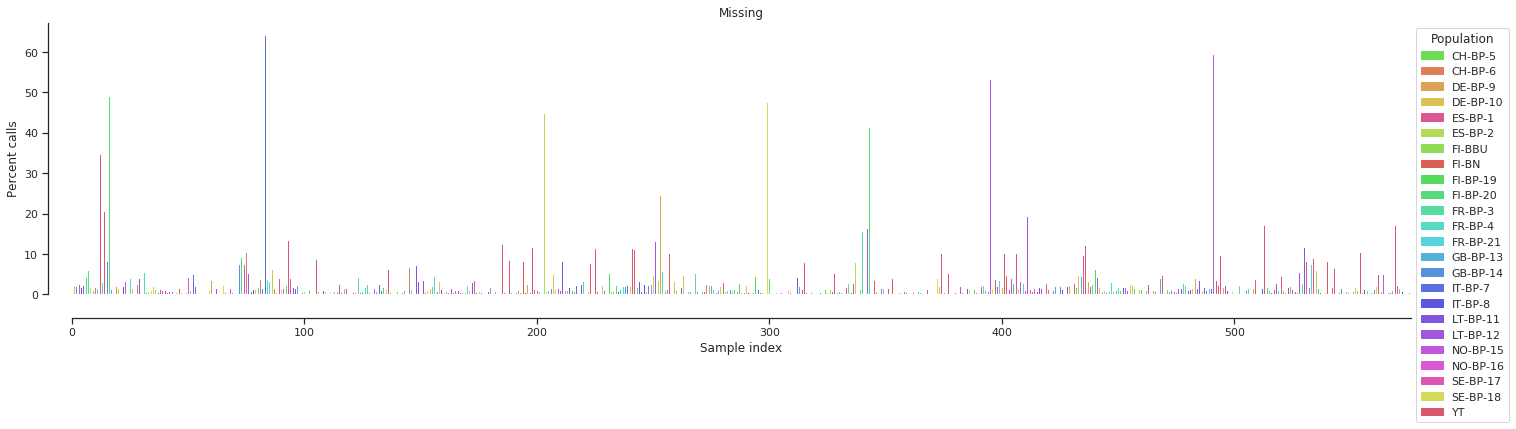

In [158]:
plot_genotype_frequency(pc_missing, 'Missing')

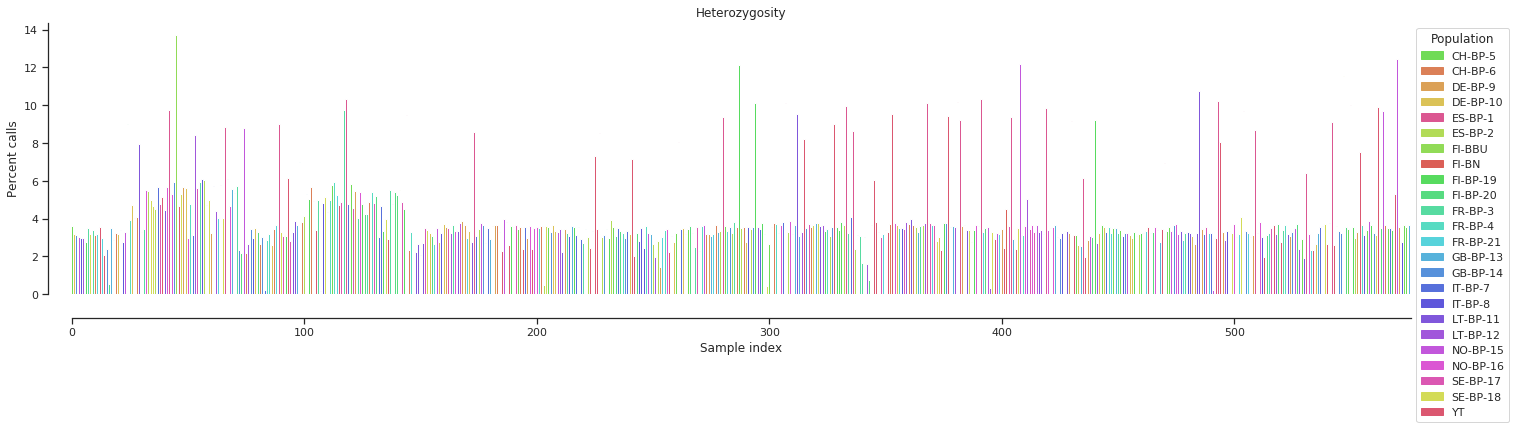

In [159]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [160]:
np.argsort(pc_missing)[-1]
###sample with highest amount of missing data

83

In [161]:
samples = samples_subset
samples

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [162]:
populations = samples.Population.unique()

In [163]:
populations

array(['CH-BP-5', 'DE-BP-10', 'GB-BP-14', 'NO-BP-15', 'IT-BP-8',
       'LT-BP-12', 'FI-BP-19', 'FR-BP-3', 'SE-BP-18', 'CH-BP-6',
       'FR-BP-21', 'YT', 'FI-BP-20', 'GB-BP-13', 'FR-BP-4', 'DE-BP-9',
       'LT-BP-11', 'NO-BP-16', 'ES-BP-2', 'IT-BP-7', 'SE-BP-17',
       'ES-BP-1', 'FI-BBU', 'FI-BN'], dtype=object)

In [164]:
ac2 = genotypes_subset_2.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(690551, 2) dtype=int32 chunks=(43160, 2)
   nbytes=5.3M cbytes=1.5M cratio=3.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [165]:
palette = sns.color_palette("hls",23)
pop_colours = {        
    'CH-BP-5': palette[15], 
    'CH-BP-6': palette[1],
    'DE-BP-9': palette[2], 
    'DE-BP-10': palette[3], 
    'ES-BP-1': palette[4], 
    'ES-BP-2': palette[5],
    'FI-BBU': palette[6], 
    'FI-BN': palette[7],
    'FI-BP-19': palette[8], 
    'FI-BP-20': palette[9],
    'FR-BP-3': palette[10],
    'FR-BP-4': palette[11],
    'FR-BP-21': palette[12],
    'GB-BP-13': palette[13],
    'GB-BP-14': palette[14],
    'IT-BP-7': palette[0],
    'IT-BP-8': palette[16],
    'LT-BP-11': palette[17],
    'LT-BP-12': palette[18],
    'NO-BP-15': palette[19],
    'NO-BP-16': palette[20],
    'SE-BP-17': palette[21],
    'SE-BP-18': palette[22],
    'YT': palette[22]
     }

In [166]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [167]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = genotypes_subset_2.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(494401, 576) dtype=int8 chunks=(1932, 576)
   nbytes=271.6M cbytes=39.5M cratio=6.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [168]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

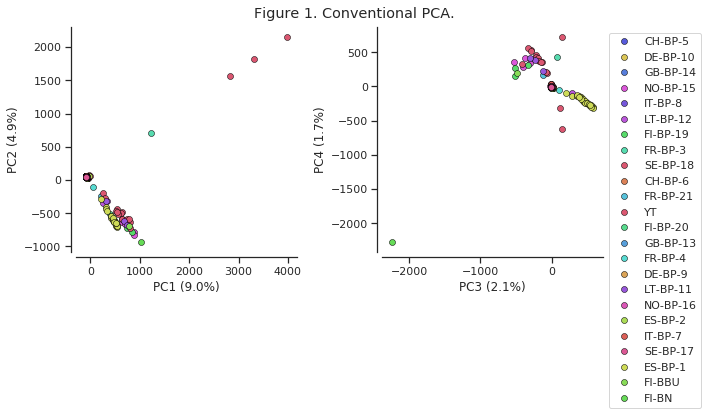

In [169]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [170]:
weirdos = coords1[:,1]>500
samples[weirdos]
###filter samples base in PC2. Expression gives a list samples above 500

,ID,Population
93,YT-1491,YT
117,FR-BP-03-11,FR-BP-3
345,YT-1489,YT
470,YT-1492,YT


In [171]:
samples2 = samples[~weirdos]

In [172]:
samples2

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [173]:
allT = np.repeat(True, len(genotypes_subset_2))

In [174]:
genotypes_subset_3 = genotypes_subset_2.subset(allT, ~weirdos)

In [175]:
genotypes_subset_3

<GenotypeChunkedArray shape=(690551, 572, 2) dtype=int8 chunks=(1349, 572, 2)
   nbytes=753.4M cbytes=94.0M cratio=8.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [176]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples2.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [177]:
ac3 = genotypes_subset_3.count_alleles()
ac3

<AlleleCountsChunkedArray shape=(690551, 2) dtype=int32 chunks=(43160, 2)
   nbytes=5.3M cbytes=1.6M cratio=3.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [178]:
flt2 = (ac3[:, :2].min(axis=1) > 1)
gf2 = genotypes_subset_3.compress(flt2, axis=0)
gn2 = gf2.to_n_alt()

In [179]:
coords2, model2 = allel.pca(gn2, n_components=10, scaler='patterson')

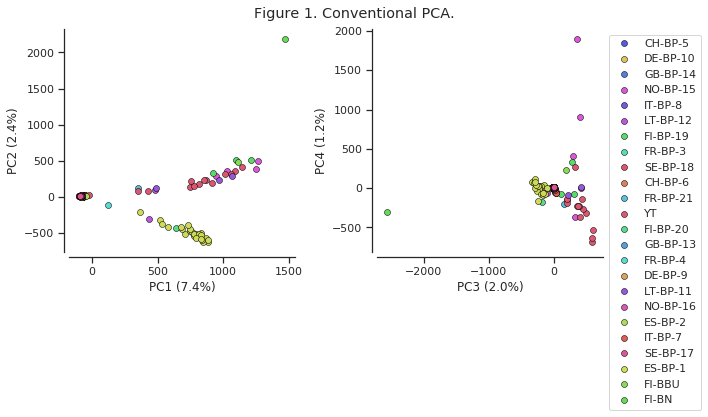

In [180]:
fig_pca(coords2, model2, 'Figure 1. Conventional PCA.')

In [181]:
weirdos2 = coords2[:,1]>1500
samples2[weirdos2]

,ID,Population
402,FI-BN,FI-BN


In [182]:
samples3 = samples2[~weirdos2]
samples3

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [183]:
allT = np.repeat(True, len(genotypes_subset_3))
genotypes_subset_4 = genotypes_subset_3.subset(allT, ~weirdos2)
genotypes_subset_4

<GenotypeChunkedArray shape=(690551, 571, 2) dtype=int8 chunks=(1349, 571, 2)
   nbytes=752.1M cbytes=93.8M cratio=8.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [184]:
ac4 = genotypes_subset_4.count_alleles()
ac4

<AlleleCountsChunkedArray shape=(690551, 2) dtype=int32 chunks=(43160, 2)
   nbytes=5.3M cbytes=1.6M cratio=3.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [185]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples3.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    
###Check that you have assigned the corresponding population list on the sample_population definition

In [186]:
ac = genotypes_subset_4.count_alleles()
flt4 = (ac[:, :2].min(axis=1) > 1)
gf4 = genotypes_subset_4.compress(flt4, axis=0)
gn = gf4.to_n_alt()

###Keeping track of the genotypes subsettings is hard!!! 

In [187]:
coords3, model3 = allel.pca(gn, n_components=10, scaler='patterson')
###modify the number of coords and model according to the number of graphs you have generated

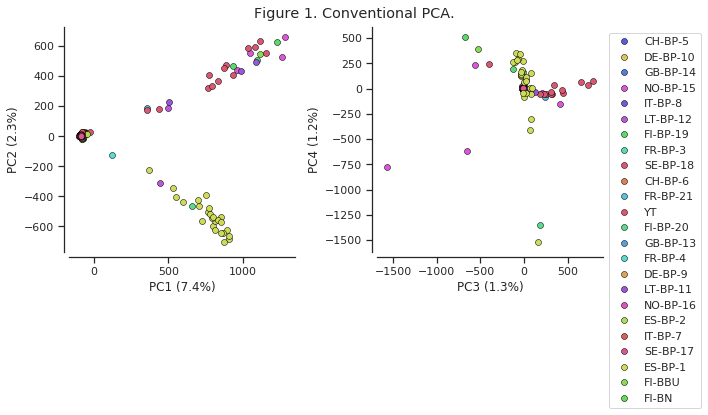

In [188]:
fig_pca(coords3, model3, 'Figure 1. Conventional PCA.')

In [196]:
weirdos3 = coords3[:,0]>100
samples3[weirdos3]
###NOTICE filter over PC1 axes [:,0]
### Filter over PC2 [:,1]

,ID,Population
12,YT-1045,YT
24,FI-BP-20-01,FI-BP-20
29,LT-BP-11-08,LT-BP-11
42,ES-BP-01-15,ES-BP-1
45,FI-BBU,FI-BBU
53,LT-BP-12-16,LT-BP-12
66,ES-BP-01-06,ES-BP-1
74,NO-BP-15-17,NO-BP-15
89,ES-BP-01-02,ES-BP-1
98,FR-BP-21-06,FR-BP-21


In [197]:
samples4 = samples3[~weirdos3]
samples4

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [198]:
allT = np.repeat(True, len(genotypes_subset_4))
genotypes_subset_5 = genotypes_subset_4.subset(allT, ~weirdos3)
genotypes_subset_5

<GenotypeChunkedArray shape=(690551, 517, 2) dtype=int8 chunks=(2698, 517, 2)
   nbytes=681.0M cbytes=75.0M cratio=9.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [199]:
ac5 = genotypes_subset_5.count_alleles()
flt5 = (ac5[:, :2].min(axis=1) > 1)
gf5 = genotypes_subset_5.compress(flt5, axis=0)
gn = gf5.to_n_alt()

In [200]:
coords4, model4 = allel.pca(gn, n_components=10, scaler='patterson')

In [201]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples4.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

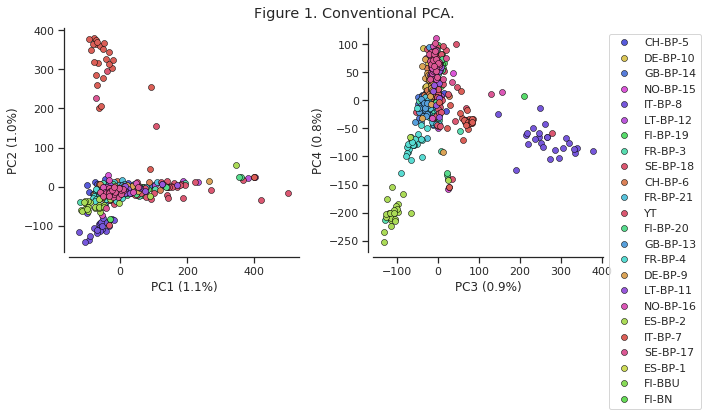

In [202]:
fig_pca(coords4, model4, 'Figure 1. Conventional PCA.')